<a href="https://colab.research.google.com/github/sivanathvenigalla/Jaya-Venkatasivanath_INFO5731_Fall2024/blob/main/Venigalla_Jayavenkatasivanath_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
from collections import defaultdict

# Example dataset - replace with your actual dataset from Assignment 2
data = [
    "This is an example tweet for demonstration purposes.",
    "Another example with different content.",
    # Add up to 100 reviews or tweets here for testing
]

# Step 1: Tri-gram Frequency Count (N=3)
def get_ngrams(text, n=3):
    words = text.lower().split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Calculate tri-gram frequencies
tri_gram_freq = defaultdict(int)
for review in data:
    for trigram in get_ngrams(review, 3):
        tri_gram_freq[trigram] += 1

print("Tri-gram frequencies:")
for trigram, count in tri_gram_freq.items():
    print(f"{trigram}: {count}")

# Step 2: Bigram Probability Calculation
def get_bigrams(text):
    words = text.lower().split()
    bigrams = zip(words, words[1:])
    return [" ".join(bigram) for bigram in bigrams]

# Initialize dictionaries for bigram and unigram counts
bigram_counts = defaultdict(int)
unigram_counts = defaultdict(int)

# Calculate bigram and unigram frequencies
for review in data:
    words = review.lower().split()
    for i in range(len(words) - 1):
        bigram = f"{words[i]} {words[i+1]}"
        bigram_counts[bigram] += 1
        unigram_counts[words[i]] += 1
    unigram_counts[words[-1]] += 1  # Count the last word as a unigram

# Calculate bigram probabilities
bigram_probabilities = {}
for bigram, count in bigram_counts.items():
    first_word = bigram.split()[0]
    bigram_probabilities[bigram] = count / unigram_counts[first_word]

print("\nBigram probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob:.2f}")

# Step 3: Noun Phrase Extraction and Relative Probability Calculation
def extract_noun_phrases(text):
    # Simplified noun phrase extraction using basic regex
    words = text.lower().split()
    noun_phrases = []
    phrase = []
    for word in words:
        if re.match(r'\b\w+\b', word):  # Simple check for alphanumeric word as a placeholder for nouns
            phrase.append(word)
        else:
            if phrase:
                noun_phrases.append(" ".join(phrase))
                phrase = []
    if phrase:
        noun_phrases.append(" ".join(phrase))
    return noun_phrases

# Calculate frequencies of noun phrases across all reviews
noun_phrase_freq = defaultdict(int)
all_noun_phrases = []

for review in data:
    noun_phrases = extract_noun_phrases(review)
    all_noun_phrases.append(noun_phrases)
    for phrase in noun_phrases:
        noun_phrase_freq[phrase] += 1

# Determine the maximum frequency of any noun phrase
max_freq = max(noun_phrase_freq.values()) if noun_phrase_freq else 1

# Display noun phrase relative probabilities in a table
print("\nNoun Phrase Relative Probabilities Table:")
header = ["Review"] + list(noun_phrase_freq.keys())
print("\t".join(header))

for i, noun_phrases in enumerate(all_noun_phrases):
    row = [f"Review {i+1}"]
    for phrase in noun_phrase_freq.keys():
        frequency = noun_phrases.count(phrase)
        relative_prob = frequency / max_freq
        row.append(f"{relative_prob:.2f}")
    print("\t".join(row))


Tri-gram frequencies:
this is an: 1
is an example: 1
an example tweet: 1
example tweet for: 1
tweet for demonstration: 1
for demonstration purposes.: 1
another example with: 1
example with different: 1
with different content.: 1

Bigram probabilities:
this is: 1.00
is an: 1.00
an example: 1.00
example tweet: 0.50
tweet for: 1.00
for demonstration: 1.00
demonstration purposes.: 1.00
another example: 1.00
example with: 0.50
with different: 1.00
different content.: 1.00

Noun Phrase Relative Probabilities Table:
Review	this is an example tweet for demonstration purposes.	another example with different content.
Review 1	1.00	0.00
Review 2	0.00	1.00


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import math
from collections import defaultdict, Counter

# Example dataset - replace with your actual dataset from Assignment 2
data = [
    "This is an outstanding movie with a haunting performance.",
    "The best movie with character development and great story.",
    "An outstanding performance and incredible character development.",
    # Add up to 100 reviews or tweets here for testing
]

# Step 1: Build TF-IDF Matrix

# Function to calculate Term Frequency (TF)
def calculate_tf(doc):
    tf = {}
    word_counts = Counter(doc.split())
    max_count = max(word_counts.values())
    for word, count in word_counts.items():
        tf[word] = count / max_count  # Normalize by maximum word frequency in the document
    return tf

# Calculate Document Frequency (DF) for each term across all documents
def calculate_df(data):
    df = defaultdict(int)
    for doc in data:
        unique_words = set(doc.split())
        for word in unique_words:
            df[word] += 1
    return df

# Calculate TF, DF, and IDF values
tf_values = [calculate_tf(doc.lower()) for doc in data]
df_values = calculate_df([doc.lower() for doc in data])
N = len(data)  # Total number of documents

# Calculate TF-IDF matrix
tf_idf_matrix = []
for tf in tf_values:
    tf_idf = {}
    for word, tf_val in tf.items():
        idf = math.log(N / (df_values[word] + 1))  # Adding 1 to avoid division by zero
        tf_idf[word] = tf_val * idf
    tf_idf_matrix.append(tf_idf)

print("TF-IDF Matrix (document-term weights):")
for i, tf_idf in enumerate(tf_idf_matrix):
    print(f"Document {i+1}: {tf_idf}")

# Step 2: Rank Documents with Respect to Query Using Cosine Similarity

# Define the query and calculate its TF-IDF representation
query = "An outstanding movie with a haunting performance and best character development."
query_tf = calculate_tf(query.lower())
query_tf_idf = {}
for word, tf in query_tf.items():
    idf = math.log(N / (df_values[word] + 1)) if word in df_values else 0
    query_tf_idf[word] = tf * idf

# Function to calculate cosine similarity
def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector[word] * query_vector.get(word, 0) for word in doc_vector)
    doc_magnitude = math.sqrt(sum(val**2 for val in doc_vector.values()))
    query_magnitude = math.sqrt(sum(val**2 for val in query_vector.values()))
    if doc_magnitude * query_magnitude == 0:
        return 0.0
    return dot_product / (doc_magnitude * query_magnitude)

# Calculate cosine similarity between each document and the query
similarities = []
for i, tf_idf in enumerate(tf_idf_matrix):
    similarity = cosine_similarity(tf_idf, query_tf_idf)
    similarities.append((i + 1, similarity))

# Sort documents by similarity to the query in descending order
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

print("\nRanked Documents with Respect to Query:")
for doc_id, similarity in similarities:
    print(f"Document {doc_id}: Similarity = {similarity:.4f}")


TF-IDF Matrix (document-term weights):
Document 1: {'this': 0.4054651081081644, 'is': 0.4054651081081644, 'an': 0.0, 'outstanding': 0.0, 'movie': 0.0, 'with': 0.0, 'a': 0.4054651081081644, 'haunting': 0.4054651081081644, 'performance.': 0.4054651081081644}
Document 2: {'the': 0.4054651081081644, 'best': 0.4054651081081644, 'movie': 0.0, 'with': 0.0, 'character': 0.0, 'development': 0.4054651081081644, 'and': 0.0, 'great': 0.4054651081081644, 'story.': 0.4054651081081644}
Document 3: {'an': 0.0, 'outstanding': 0.0, 'performance': 0.4054651081081644, 'and': 0.0, 'incredible': 0.4054651081081644, 'character': 0.0, 'development.': 0.4054651081081644}

Ranked Documents with Respect to Query:
Document 3: Similarity = 0.5164
Document 1: Similarity = 0.4000
Document 2: Similarity = 0.2000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

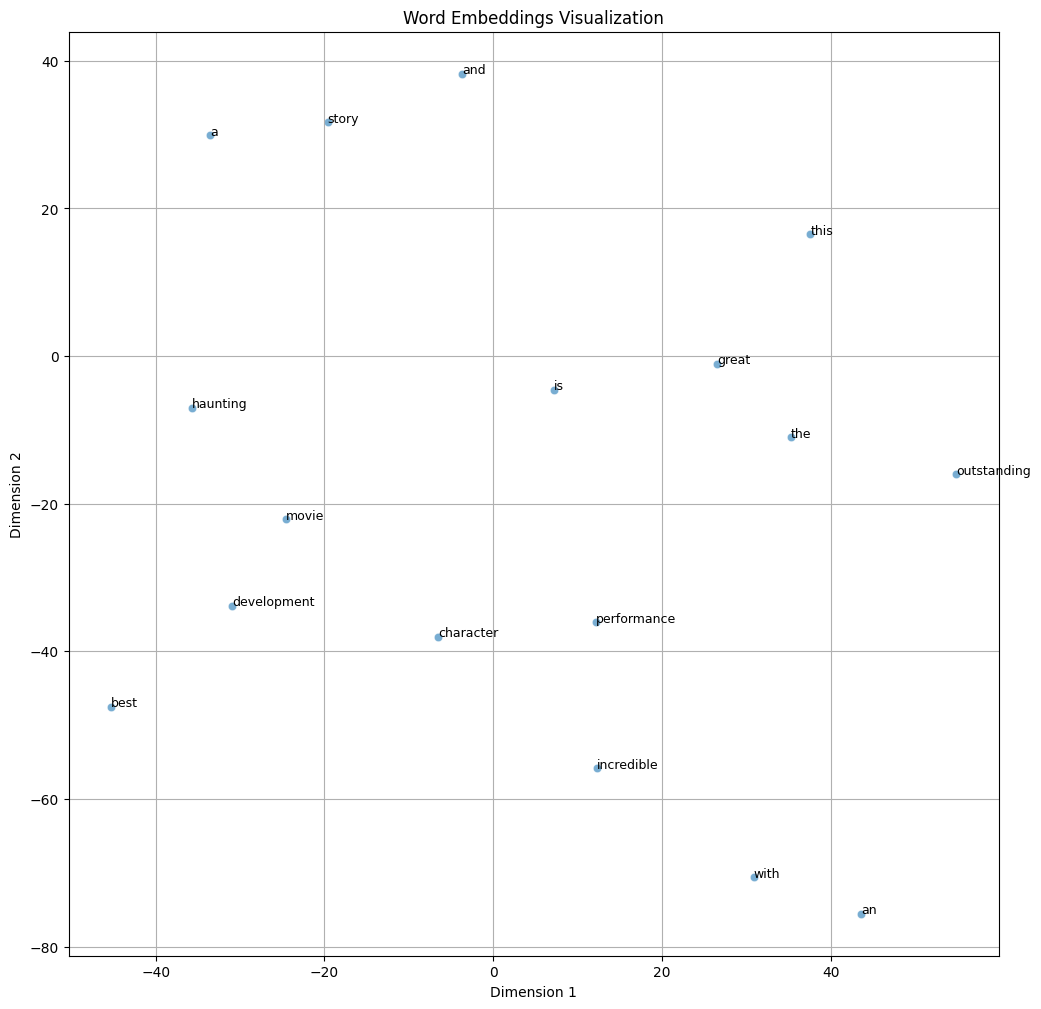

In [ ]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import re

# Replace this with your actual dataset collected for assignment 2
data = [
    "This is an outstanding movie with a haunting performance.",
    "The best movie with character development and great story.",
    "An outstanding performance and incredible character development.",
    # Add more reviews or tweets for testing
]

# Preprocess the data: Tokenize, lower case, and remove punctuation
def preprocess_data(data):
    processed_data = []
    for review in data:
        # Remove punctuation and convert to lower case
        review = re.sub(r'[^\w\s]', '', review.lower())
        processed_data.append(review.split())
    return processed_data

processed_data = preprocess_data(data)

# Step 1: Train a Word2Vec model
# Train the model with 300 dimensions
model = Word2Vec(sentences=processed_data, vector_size=300, window=5, min_count=1, sg=1)

# Step 2: Visualize the word embeddings
# To visualize the embeddings, we need to reduce the dimensionality
words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

# Use TSNE for dimensionality reduction
perplexity_value = 5  # Adjust this value as necessary
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)  # Added random_state for reproducibility
reduced_vectors = tsne.fit_transform(word_vectors)

# Create a DataFrame for easy plotting
plt.figure(figsize=(12, 12))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], alpha=0.6)

# Annotate points with words
for i in range(len(words)):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], words[i], fontsize=9)

plt.title("Word Embeddings Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:


import pandas as pd

# Sample data: List of tuples (document_id, clean_text, sentiment)
data = [
    (1, "This movie was absolutely fantastic!", "Positive"),
    (2, "I didn't like the plot; it was very boring.", "Negative"),
    (3, "The performance was okay, nothing special.", "Neutral"),
    (4, "An amazing experience; I loved every moment!", "Positive"),
    (5, "It was a waste of time and money.", "Negative"),
]

# Create a DataFrame from the sample data
df = pd.DataFrame(data, columns=["document_id", "clean_text", "sentiment"])

# Save the DataFrame to a CSV file
csv_file_path = "annotated_sentiment_data.csv"
df.to_csv(csv_file_path, index=False)

print(f"CSV file '{csv_file_path}' created successfully.")


CSV file 'annotated_sentiment_data.csv' created successfully.


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In this assignment, I explored core NLP techniques through practical tasks. Starting with **N-gram Analysis**, I manually calculated tri-gram and bi-gram frequencies and probabilities to uncover word patterns in my dataset. Building these from scratch, rather than using libraries, deepened my understanding of the underlying algorithms, even though it was challenging at times.

For **TF-IDF and Document Ranking**, I created a document-term matrix to assess term relevance across documents, then used cosine similarity to rank documents. This process highlighted how unique terms impact relevance, and constructing it manually helped solidify my grasp of term weighting.

In **Word Embedding Model Creation**, I trained a 300-dimensional Word2Vec model and visualized word relationships in reduced dimensions with TSNE, which revealed meaningful word clusters.

Lastly, **Sentiment Analysis Dataset Creation** involved labeling data for sentiment, laying the groundwork for future text classification tasks. This comprehensive assignment was insightful and well-paced.
